In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# dataset_list = sns.get_dataset_names()

In [39]:
df = sns.load_dataset('iris')

In [40]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [41]:
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [42]:
df.shape

(150, 5)

In [43]:
from sklearn.cluster import KMeans

In [44]:
# X = df.drop(columns='species')

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/Users/andishetavakkoli/miniconda3/envs/ml_web_app/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [46]:
labels = kmeans.predict(X)

In [47]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

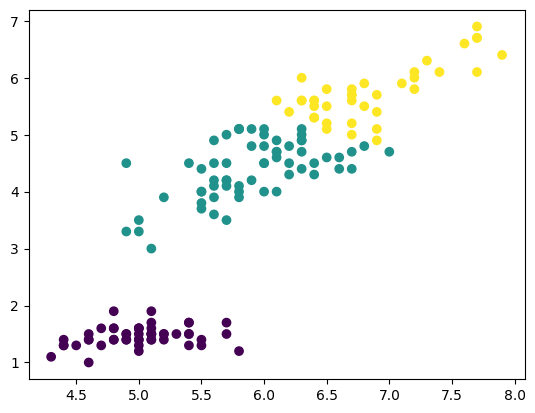

In [48]:
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=labels)
plt.show()

In [52]:
species = df['species']

In [53]:
df_new = pd.DataFrame({'labels': labels, 'species': species})

In [59]:
ct = pd.crosstab(df_new['labels'], df_new['species'])

In [60]:
ct

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [116]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [94]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [100]:
pl = Pipeline(
    [
        ('scaler', StandardScaler()), 
    ('model', KMeans(n_clusters=3))
    ]
)

In [101]:
pl.fit(df)

/Users/andishetavakkoli/miniconda3/envs/ml_web_app/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('scaler', StandardScaler()), ('model', KMeans(n_clusters=3))])

In [102]:
labels = pl.predict(df)

In [103]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [104]:
df_new_2 = pd.DataFrame({'labels': labels, 'species': species})

In [108]:
ct_new = pd.crosstab(df_new_2['labels'], df_new_2['species'])

In [109]:
ct_new

species,setosa,versicolor,virginica
labels,,,
0,50,0,0
1,0,3,47
2,0,47,3


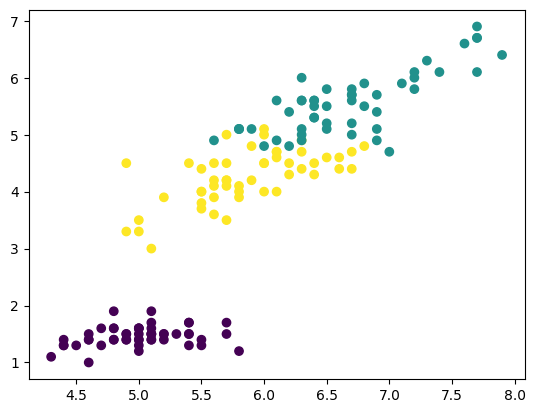

In [110]:
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=labels)
plt.show()

In [111]:
inertia = kmeans.inertia_

In [112]:
inertia

78.851441426146

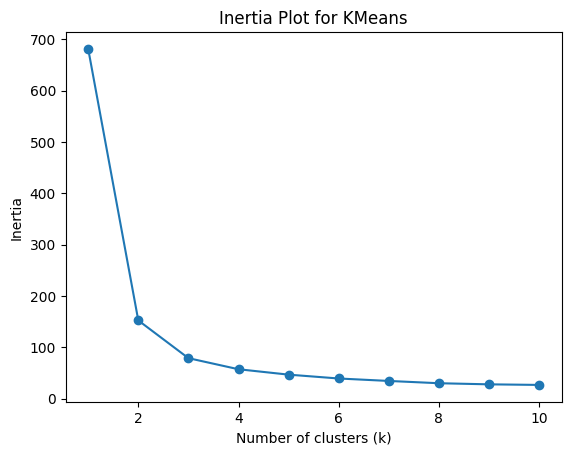

In [115]:
inertia = []

# Define range of k values
k_values = range(1, 11)

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Plot for KMeans')
plt.show()

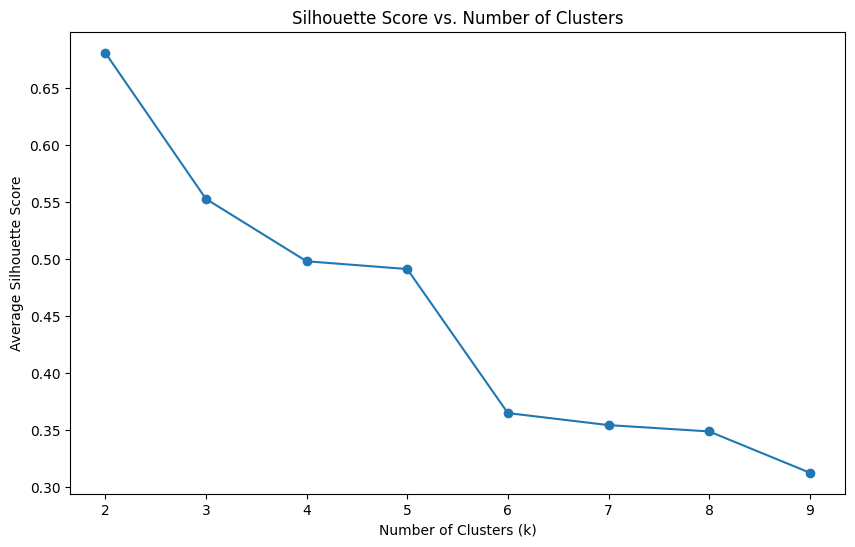

In [117]:
silhouette_scores = []

# Fit k-means clustering with different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

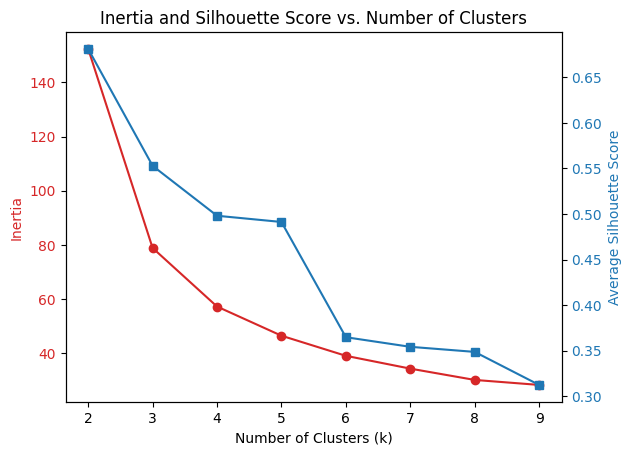

In [118]:
# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Fit k-means clustering with different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot inertia and silhouette scores for different values of k
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range(2, 10), inertia_values, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Silhouette Score', color=color)
ax2.plot(range(2, 10), silhouette_scores, color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Inertia and Silhouette Score vs. Number of Clusters')
plt.show()

In [9]:
a = [2, 4, 6, 8, 10]
b = []

for i in range(5):
    c = a[i] ** 2
    b.append(c)
    
    
    

In [10]:
b

[4, 16, 36, 64, 100]

In [28]:
models = {
        "LogisticRegression": 3,
        "DecisionTreeClassifier": 5,
        "KNeighborsClassifier": 7}
   

In [29]:
c = []
for k, v in models.items():
    c.append(v)
    

In [31]:
c

[3, 5, 7]